<a id='I' name="I"></a>
## [Introduction](#P0)

This notebook acts as a helper to prepare data for training a machine learning model.   
Ideal workflow:   
- Read the dataset information and details at the source.
- Download the dataset using pandas.
- List all the columns and try to interpret each one.
- Identify artifacts and other unusual things at first.
- Use analyse dataframe to do analysis - level 2.
- Exploratory data analysis
- Feature selection
- Scaling and normalization
- Data splitting - Train test validation

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

### Packages

In [1]:
# General
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Custom classes and functions

In [2]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushya/Snippets')

from DataFrame_Analysis import analyze_dataframe

### Global Parameters Setting

In [3]:
plt.style.use("ggplot")

## Data Retrieval and introduction


__Adult Census Income__: Dataset consisting of cencus information for adult population and the model predicts if their salary is >50K based on that information.

#### Download Data

In [4]:
# import the dataset
df = pd.read_csv('../data/raw/card_transactions.csv')

#### Data exploration

In [5]:
# Basic:
# 1. Shape
# 2. Columns - look for artifacts in column name
# 3. Info - look for appropriate datatypes 
# 4. Describe - look for min max mean and std. 

In [6]:
df.shape

(8500, 18)

In [7]:
df.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

In [8]:
# some columns have a '.' in the column name (must correct)
# 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [10]:
df.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8499.000000,8500.000000,8500.000000,8202.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.848704,11.516118,1721.250989,865.594683,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.804040,1.339121,2893.200899,2389.297977,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,168.712104,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146952,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,826.426929,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


In [11]:
# Initial observations

In [12]:
# Find duplicate values and remove duplicates
# Find missing values
# Find wrong values like ?, none, -, etc. 
# fill with 'unknown'

#----------------------
# In any column - group some values to new cateories
# 
# ---------------------
# If there is a date time column, then extract the day, month and year separately
# as object datatypes
#----------------------
# Some columns can be dropped
# Some columns have unwanted space ' ' in the name, remove if that is the case
#-----------------------
# After the cleaning save the cleaned dataframe in csv format


In [13]:
# Check for missing values in the DataFrame
df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [14]:
# Display all duplicate rows
# Identify duplicate rows
df.duplicated().sum()


0

In [15]:
# Remove duplicate(if any)
df_cleaned = df.drop_duplicates(keep = 'first')


In [16]:
# Replace incorrect or placeholder values with 'unknown'
incorrect_values = ['?', 'none', '-', 'N/A', 'nan','NaN', 'NULL']
df_cleaned.replace(incorrect_values, 'unknown', inplace=True)


In [18]:
df_cleaned['min_payments'].fillna(0,inplace=True)

In [19]:
df_cleaned['min_payments']

0        89.711672
1        82.955180
2       443.781316
3       795.859808
4        40.142262
           ...    
8495    260.277533
8496    150.500248
8497      0.000000
8498    497.408854
8499    437.075647
Name: min_payments, Length: 8500, dtype: float64

In [ ]:
# Convert the 'datetime_col' to datetime if not already in datetime format
df_cleaned['datetime_col'] = pd.to_datetime(df_cleaned['datetime_col'], errors='coerce')

# Extract day, month, and year as separate columns
df_cleaned['day'] = df_cleaned['datetime_col'].dt.day.astype('str')
df_cleaned['month'] = df_cleaned['datetime_col'].dt.month.astype('str')
df_cleaned['year'] = df_cleaned['datetime_col'].dt.year.astype('str')


In [ ]:
# Drop unwanted columns
columns_to_drop = ['col1', 'col2', 'col3'] 
df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [20]:
# Remove leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned.columns

Index(['customer_id', 'balance_account', 'purchases_amount', 'paid_advance',
       'full_purchases', 'balance_frequency_update', 'installments',
       'purchases_frequency', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

In [21]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../data/processed/adult_cleaned.csv', index=False)

In [22]:
df = df_cleaned

In [23]:
# Advanced (Separate categorical and numerical)
# 1. value counts | Unique values | Missing values
# 2. Explore column of interest
#    1. Hist / Countplot
#    2. Boxplot

#### Perform exploratory data analysis on each column

In [24]:
from DataFrame_Analysis import eda

--------------------Categorical features -------------------------
--------------------Customer_Id-------------------------


customer_id
tGEg8fT2eCgVxdwS    1
ZcLmL8Ud5jbpDd85    1
KafssURWkuiivJ9K    1
DYKcG8qtwA4E9A4X    1
M0oSySZ3de55P79D    1
                   ..
9WwdZJsSv8hUkoRP    1
T0B5ce0LlBlBmOqk    1
pQir6zjlfFwfM8zj    1
8jb47zfdDLhNHyfp    1
QIwf3M4Yn4EHwAyv    1
Name: count, Length: 8500, dtype: int64

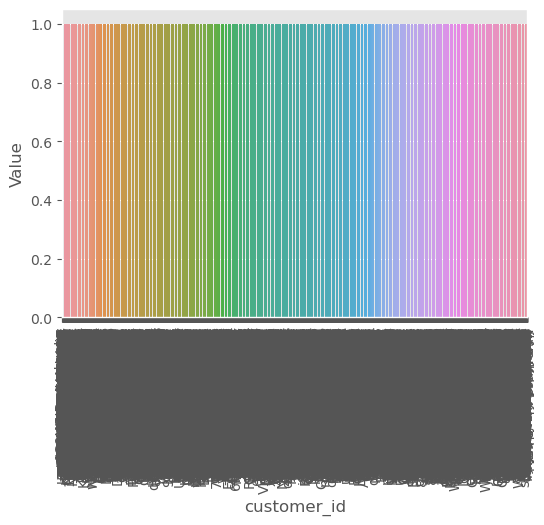

--------------------Numerical features -------------------------
--------------------Balance_Account-------------------------


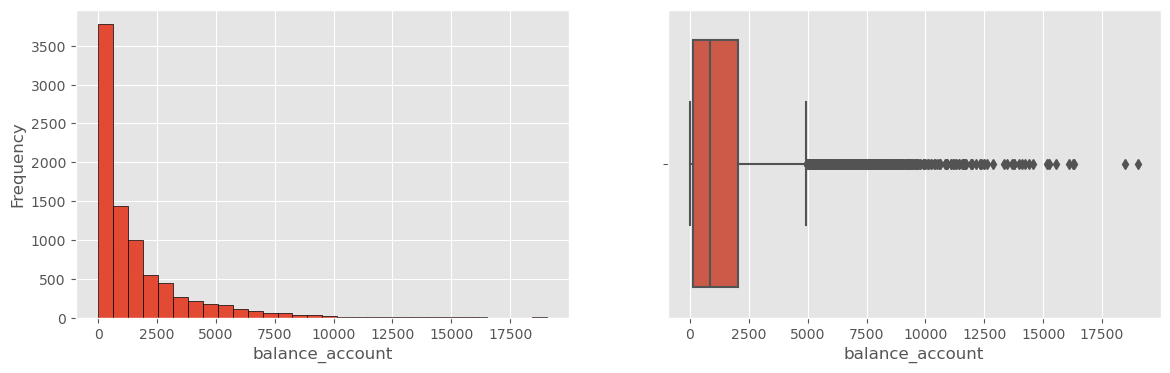

--------------------Purchases_Amount-------------------------


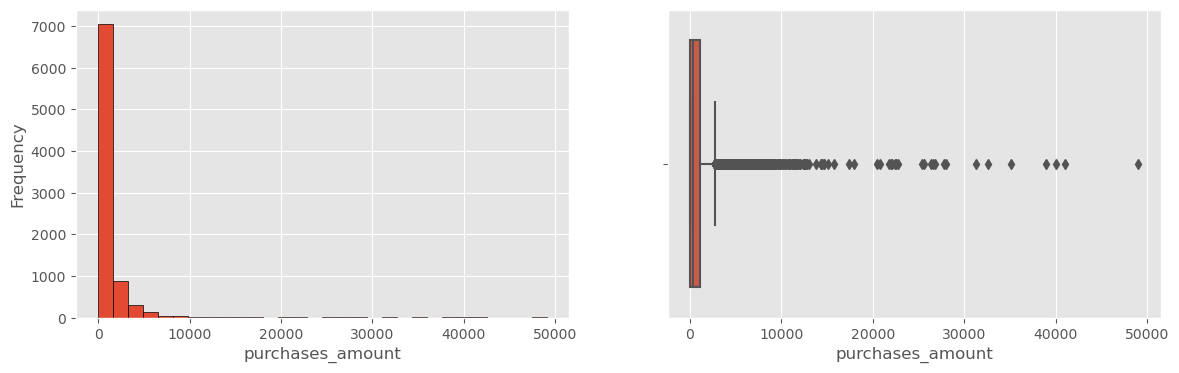

--------------------Paid_Advance-------------------------


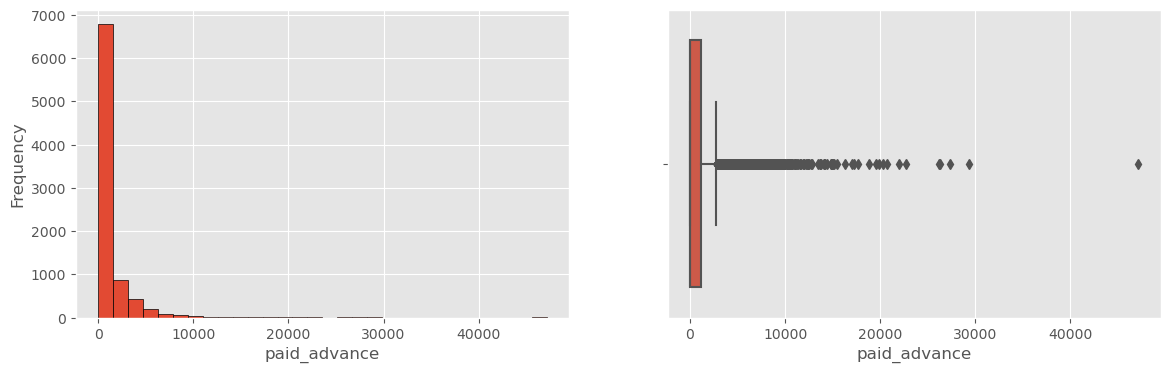

--------------------Full_Purchases-------------------------


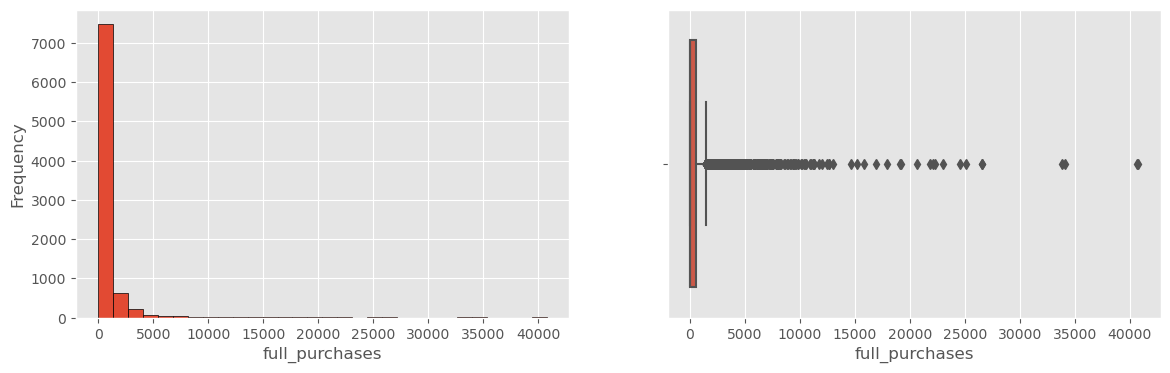

--------------------Balance_Frequency_Update-------------------------


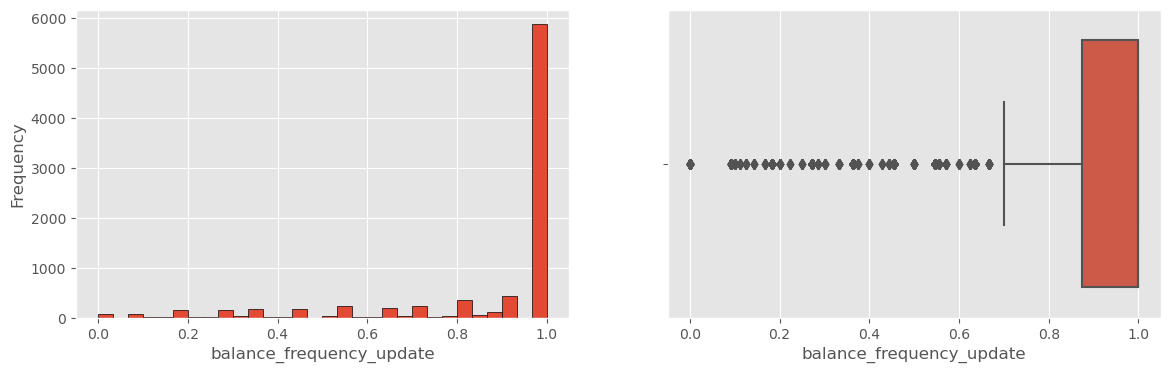

--------------------Installments-------------------------


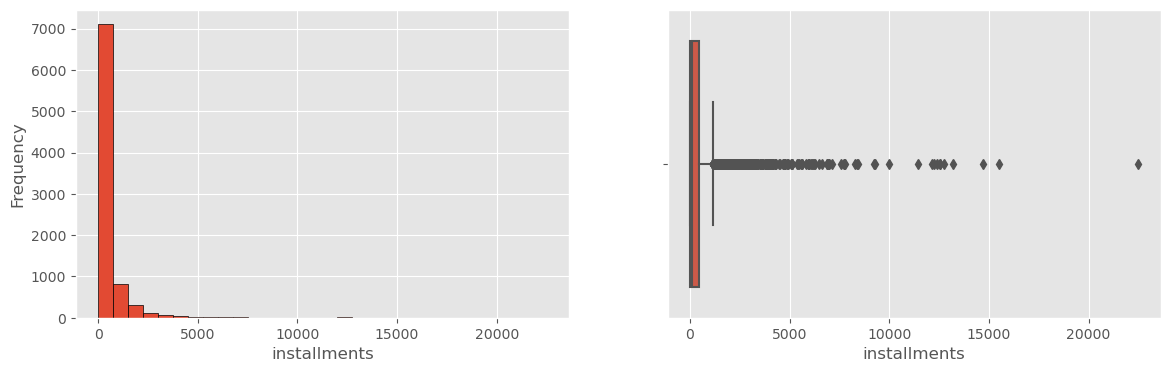

--------------------Purchases_Frequency-------------------------


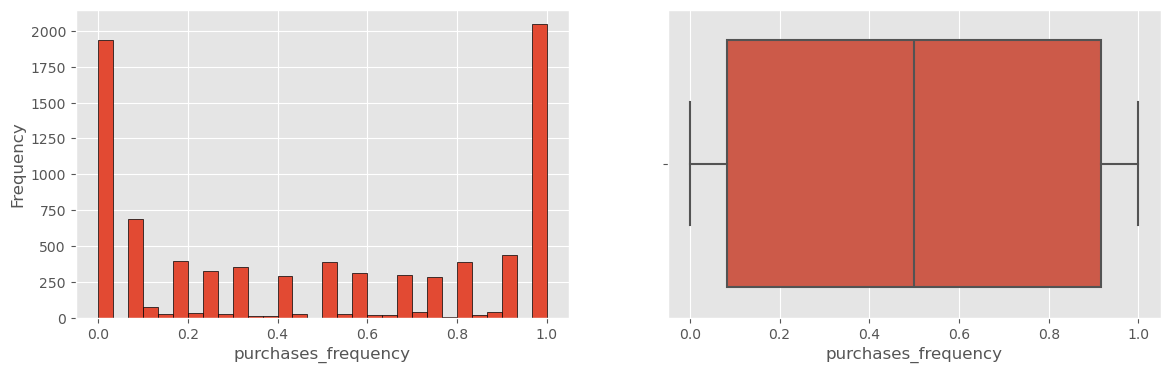

--------------------Full_Purchases_Frequency-------------------------


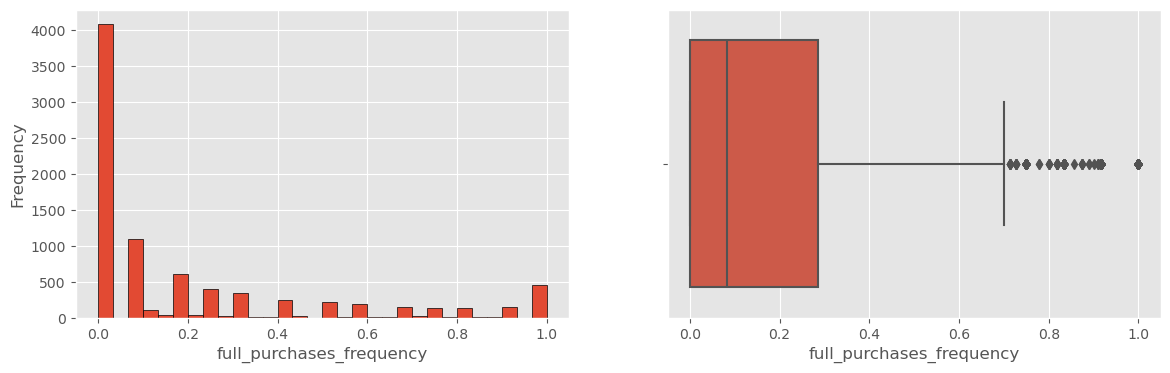

--------------------Purchases_Installments_Frequency-------------------------


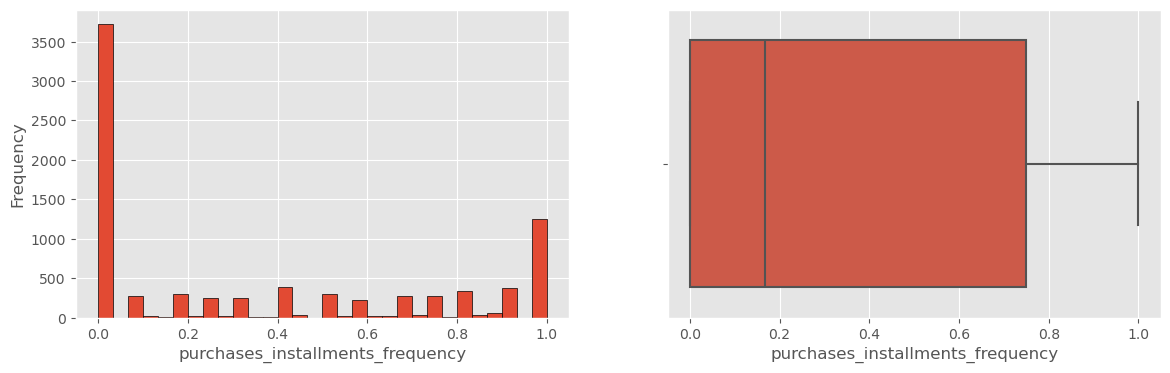

--------------------Cash_Advance_Frequency-------------------------


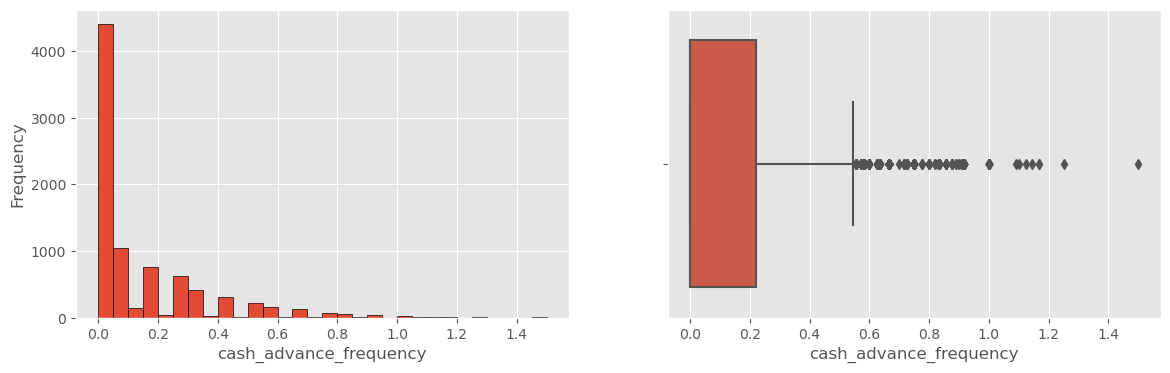

--------------------Nr_Cash_Advances-------------------------


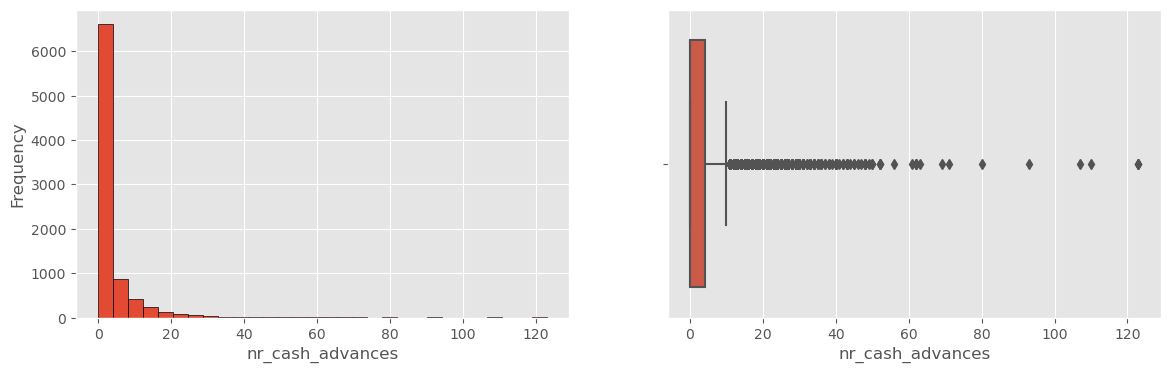

--------------------Nr_Purchases-------------------------


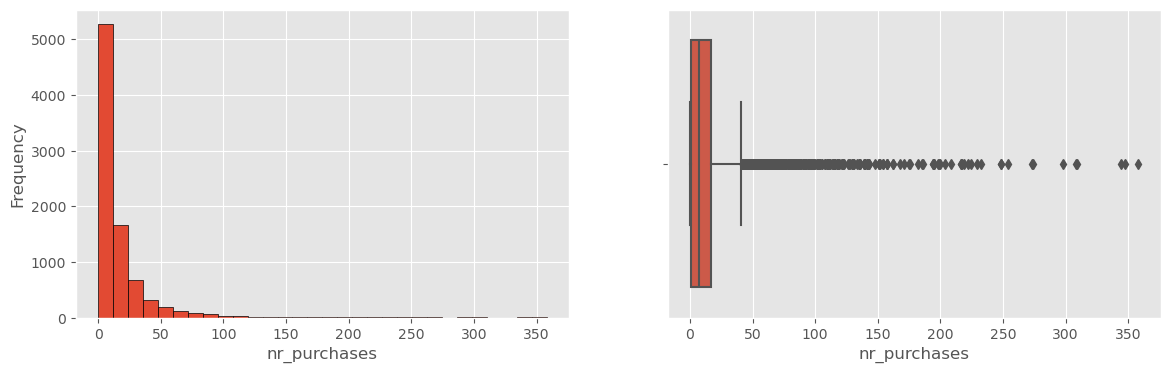

--------------------Credit_Limit-------------------------


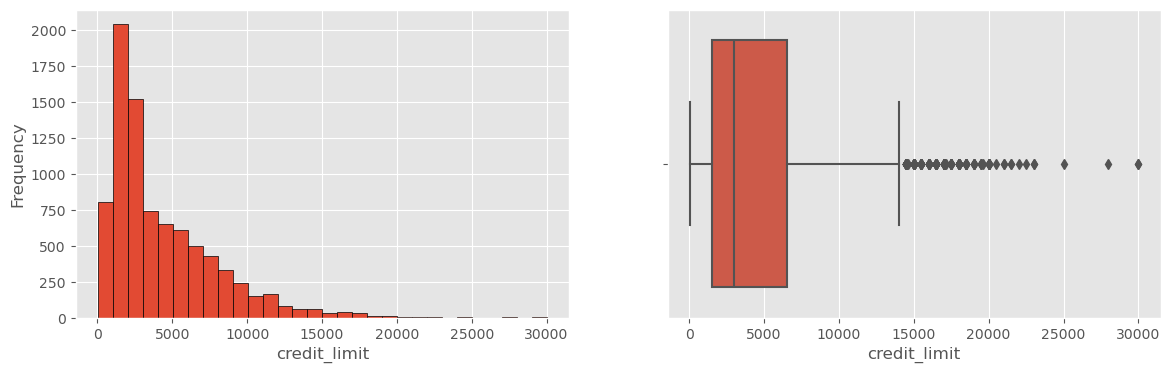

--------------------Fixed_Rate_Period-------------------------


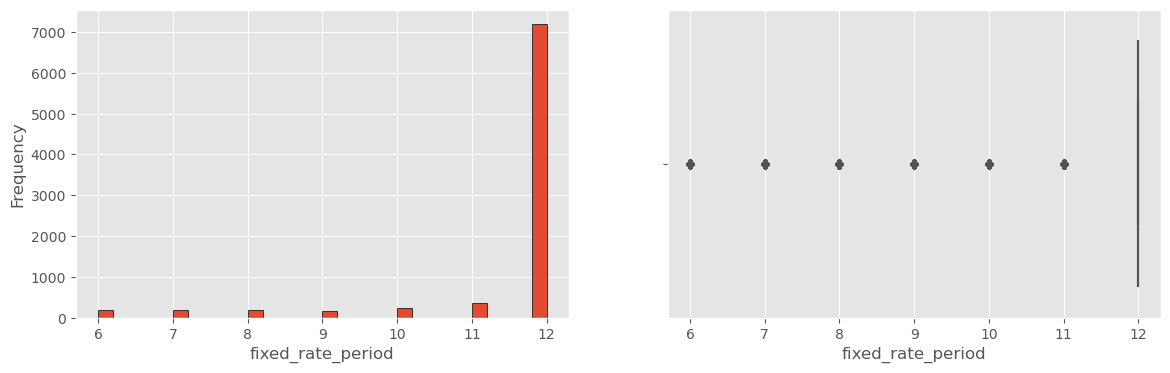

--------------------Payments-------------------------


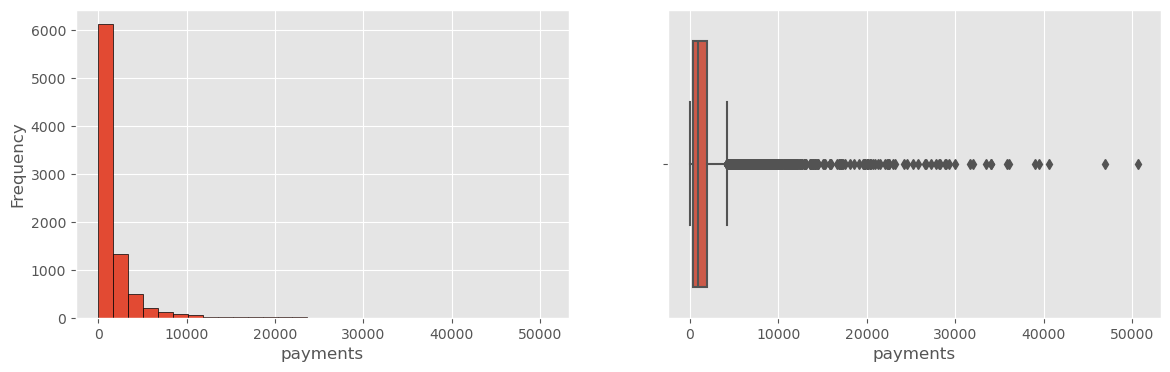

--------------------Min_Payments-------------------------


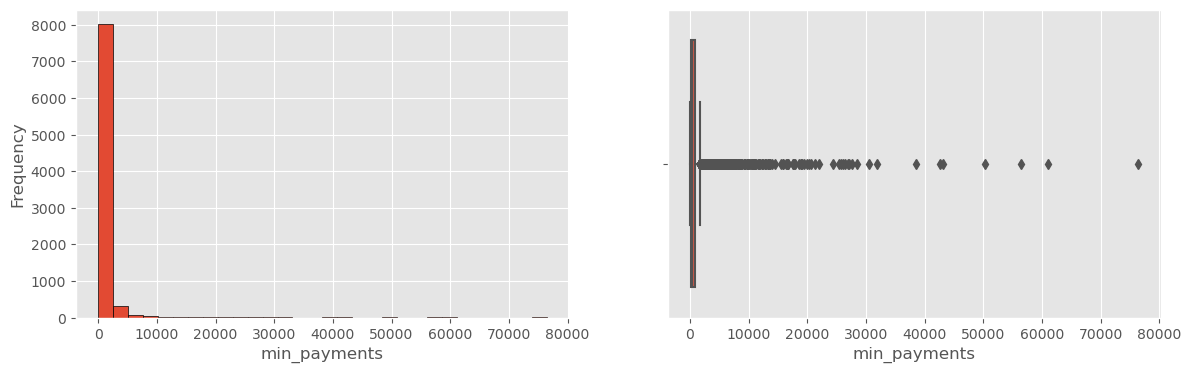

--------------------Full_Payment_Prc-------------------------


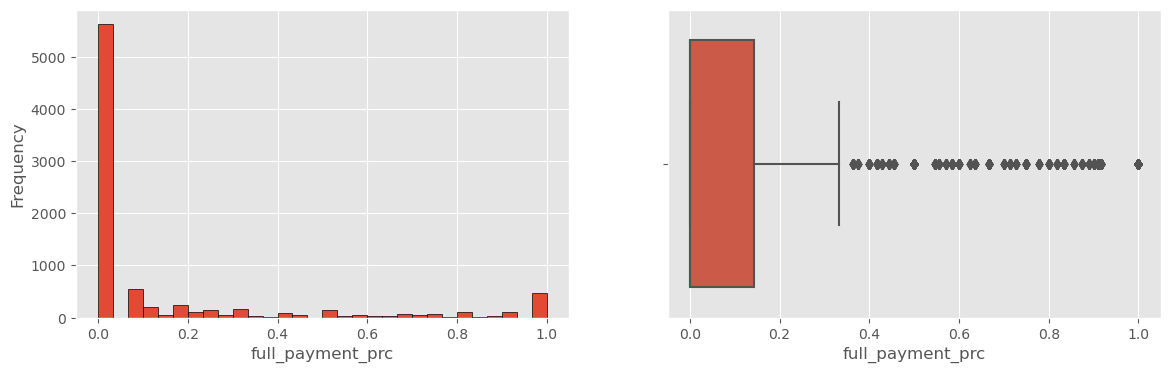

In [25]:
eda(df)

In [33]:
X_scaled.isna().sum()

balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [32]:
X_scaled.fillna(0,inplace=True)

In [28]:
# Select relevant features
X = df.drop(columns=['customer_id'])

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,-0.744666,-0.414083,-0.468389,-0.352328,0.138183,-0.334153,1.046519,-0.678245,1.144149,-0.673477,-0.474675,-0.187082,-0.960397,-0.385438,-0.563901,-0.316940,0.946810
1,-0.723920,-0.394260,-0.468389,-0.352328,0.520953,-0.287234,1.273196,-0.678245,1.182300,-0.673477,-0.474675,-0.347081,-0.960397,-4.119450,-0.576049,-0.319813,-0.523476
2,-0.098138,-0.464035,-0.245690,-0.352328,0.520953,-0.452383,-1.220250,-0.678245,-0.916043,0.684186,0.400665,-0.587080,-0.822641,-0.385438,-0.490219,-0.166419,-0.523476
3,0.217997,-0.295433,-0.468389,-0.134773,0.520953,-0.452383,1.273196,2.680406,-0.916043,-0.673477,-0.474675,-0.067082,-0.684884,0.361364,-0.351538,-0.016745,-0.523476
4,-0.738436,-0.419933,0.090712,-0.295420,-2.158437,-0.452383,-1.012464,-0.398359,-0.916043,0.156208,-0.037005,-0.547080,-0.547127,0.361364,0.820251,-0.338013,-0.523476


--------------------Categorical features -------------------------
--------------------Numerical features -------------------------
--------------------Balance_Account-------------------------


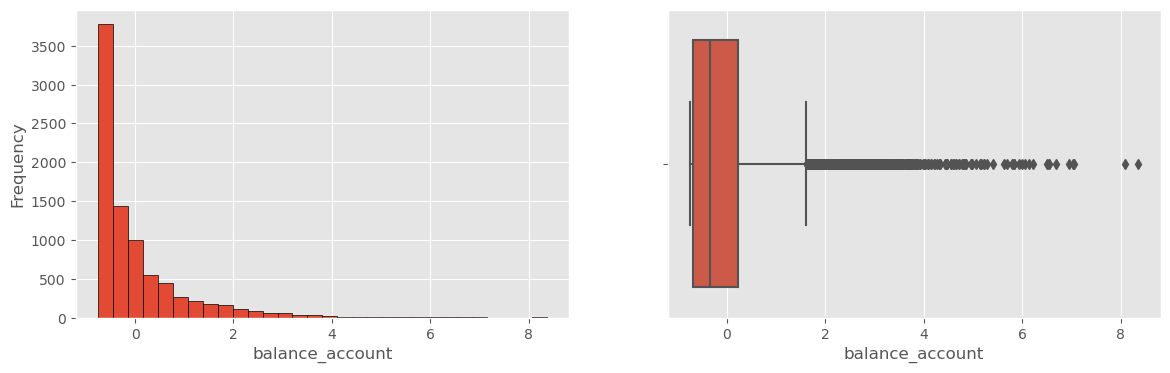

--------------------Purchases_Amount-------------------------


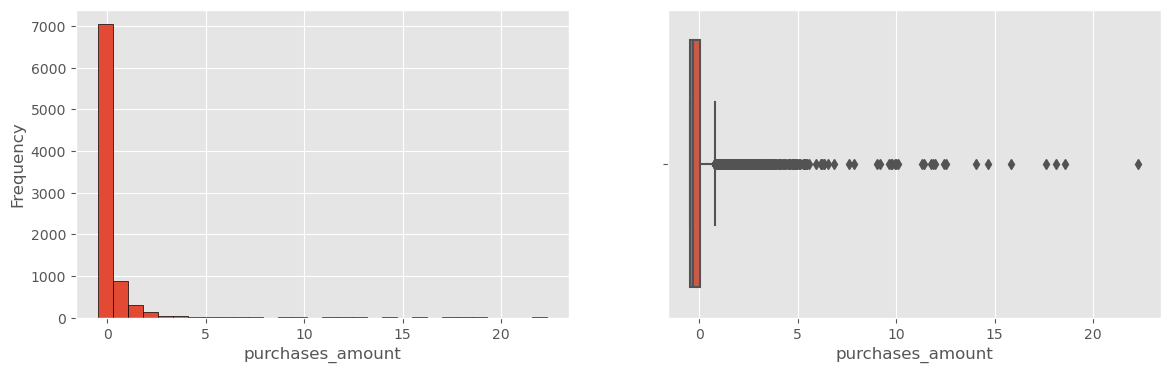

--------------------Paid_Advance-------------------------


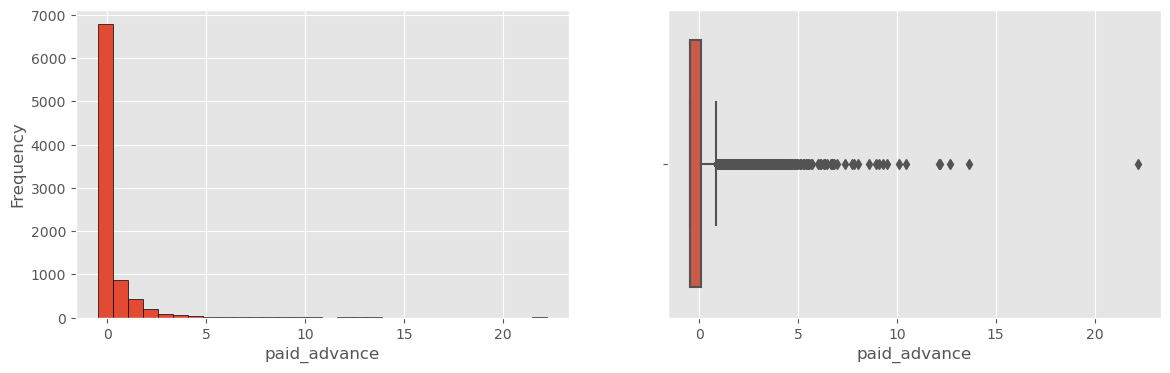

--------------------Full_Purchases-------------------------


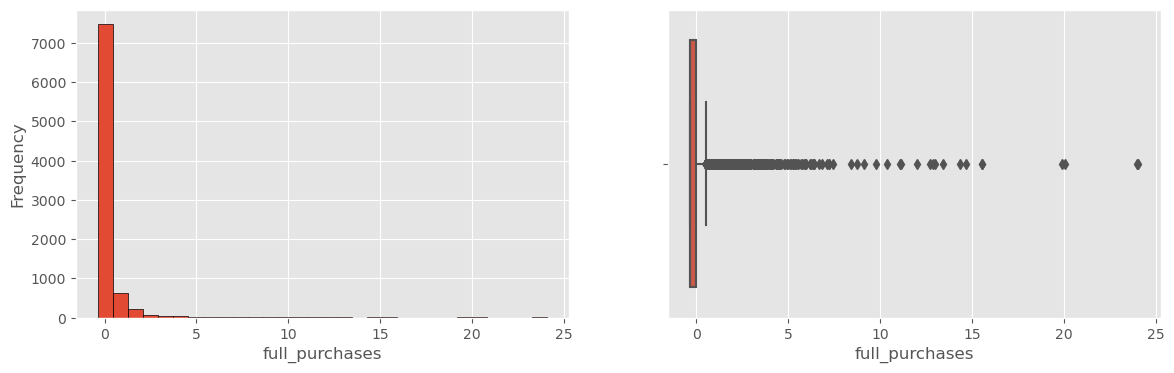

--------------------Balance_Frequency_Update-------------------------


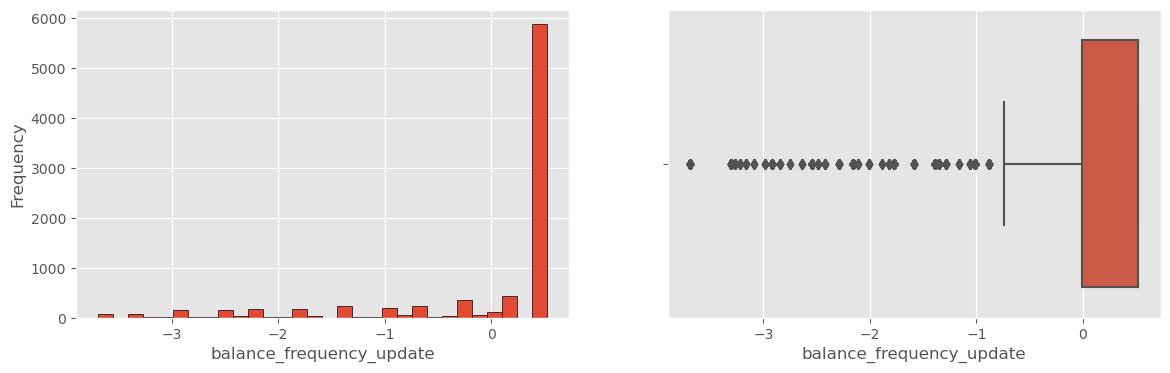

--------------------Installments-------------------------


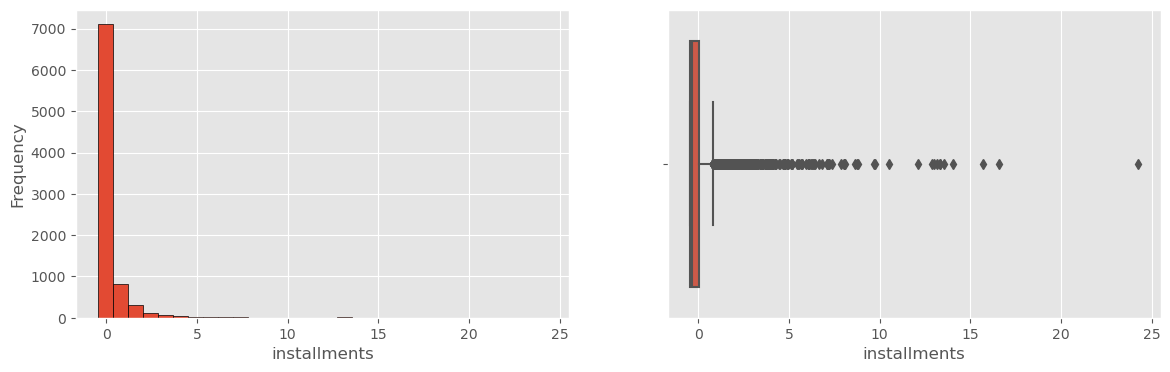

--------------------Purchases_Frequency-------------------------


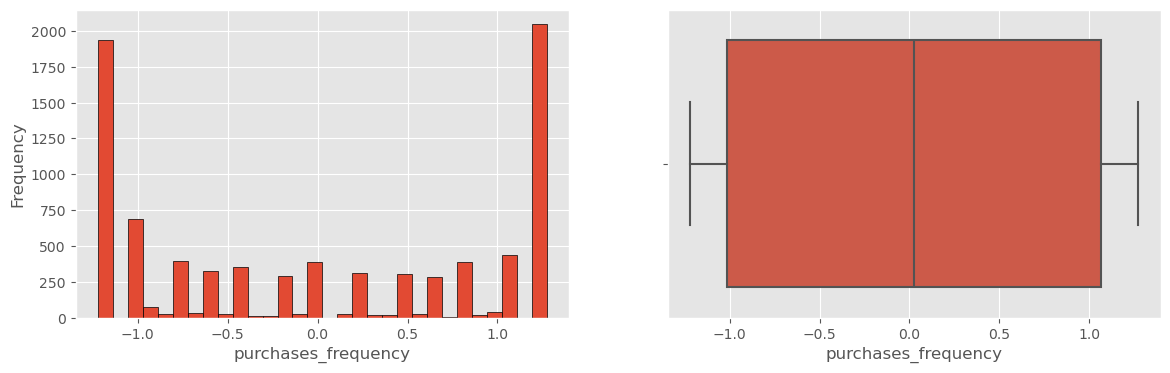

--------------------Full_Purchases_Frequency-------------------------


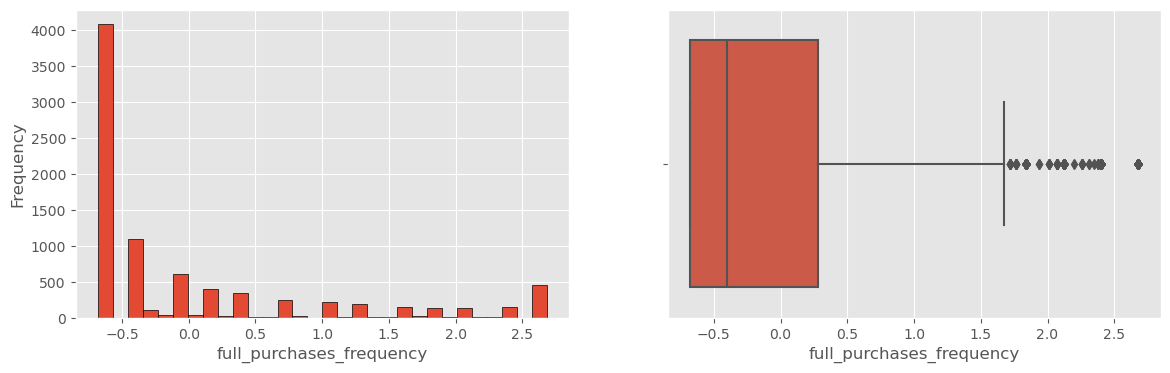

--------------------Purchases_Installments_Frequency-------------------------


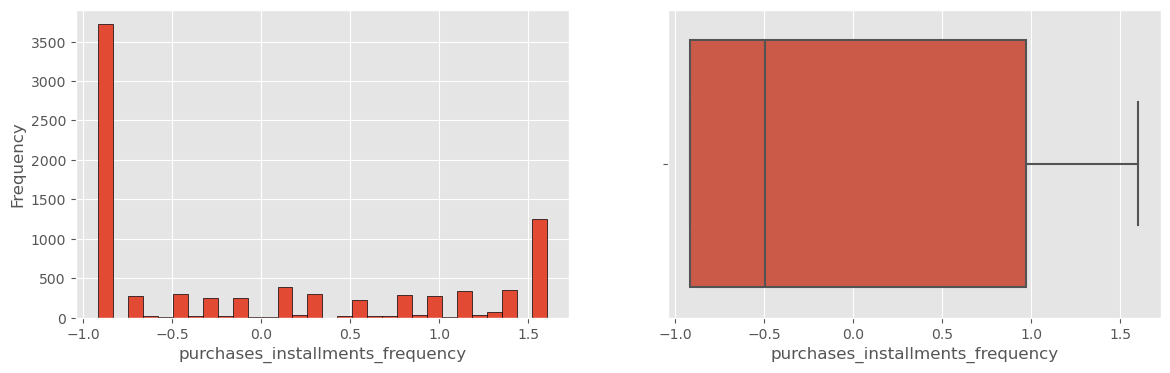

--------------------Cash_Advance_Frequency-------------------------


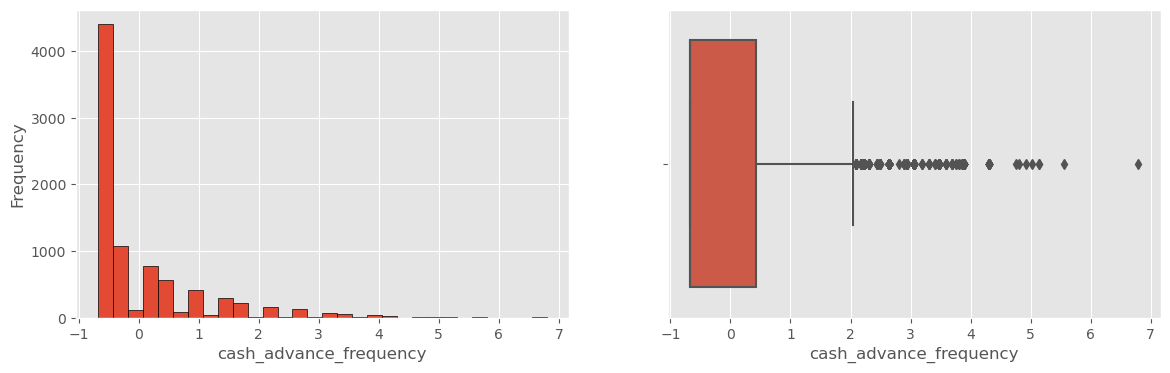

--------------------Nr_Cash_Advances-------------------------


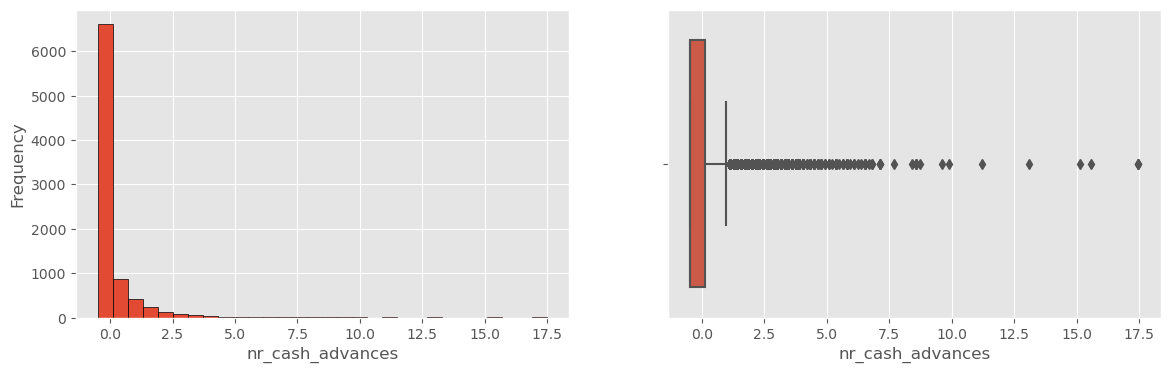

--------------------Nr_Purchases-------------------------


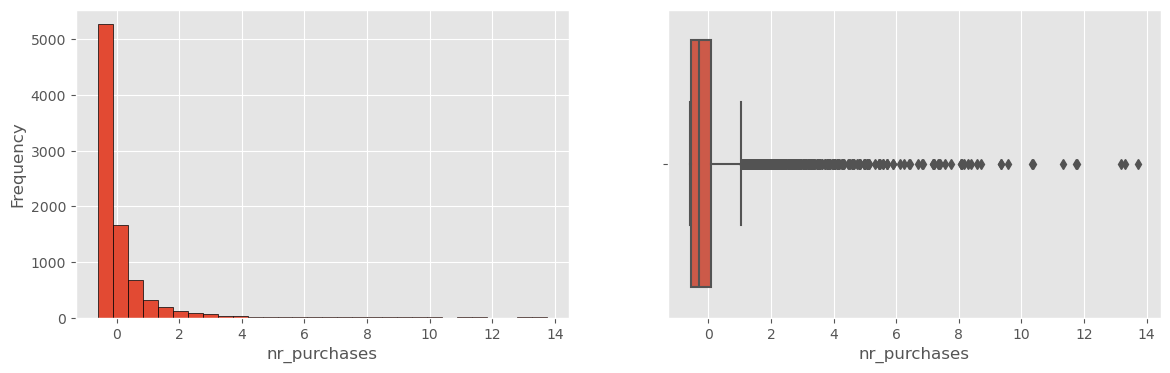

--------------------Credit_Limit-------------------------


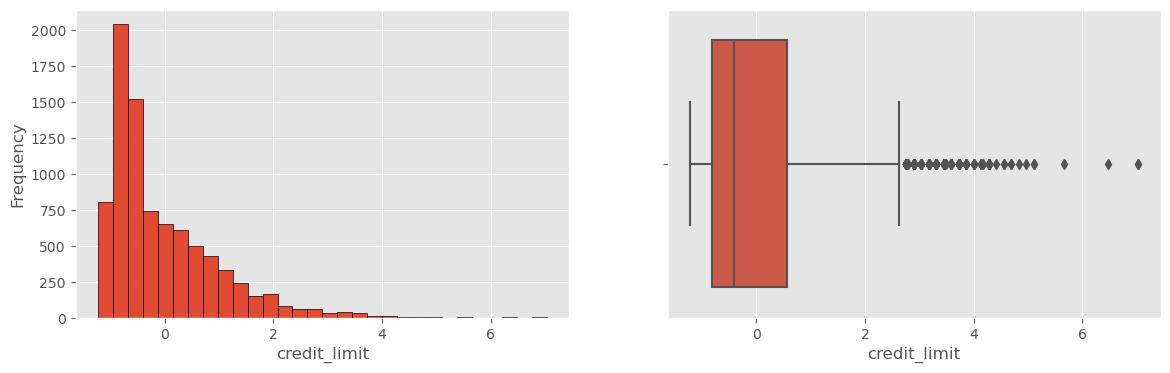

--------------------Fixed_Rate_Period-------------------------


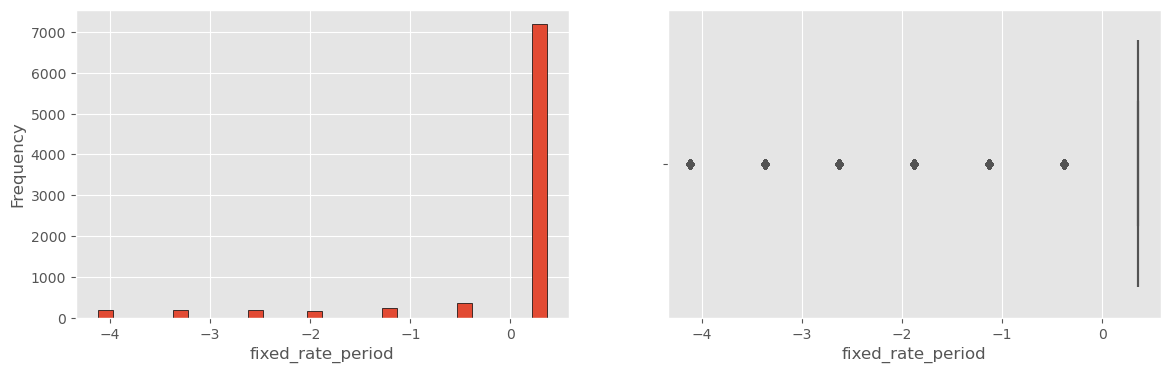

--------------------Payments-------------------------


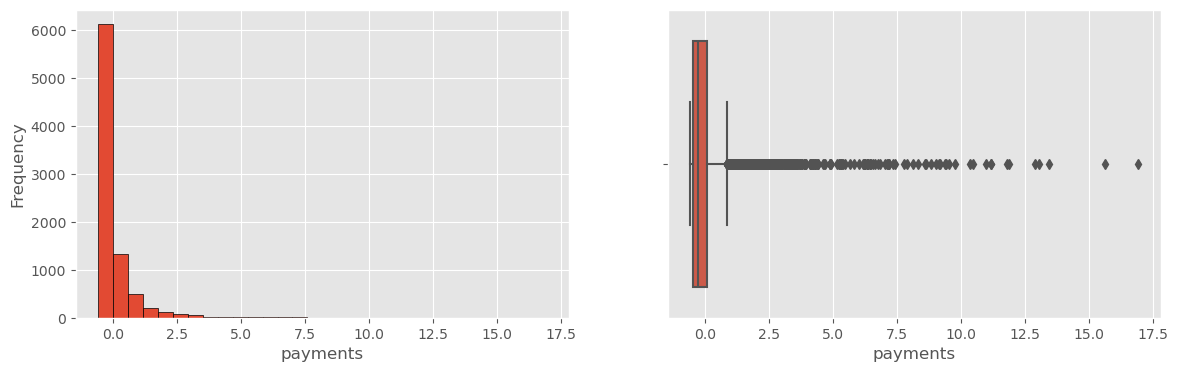

--------------------Min_Payments-------------------------


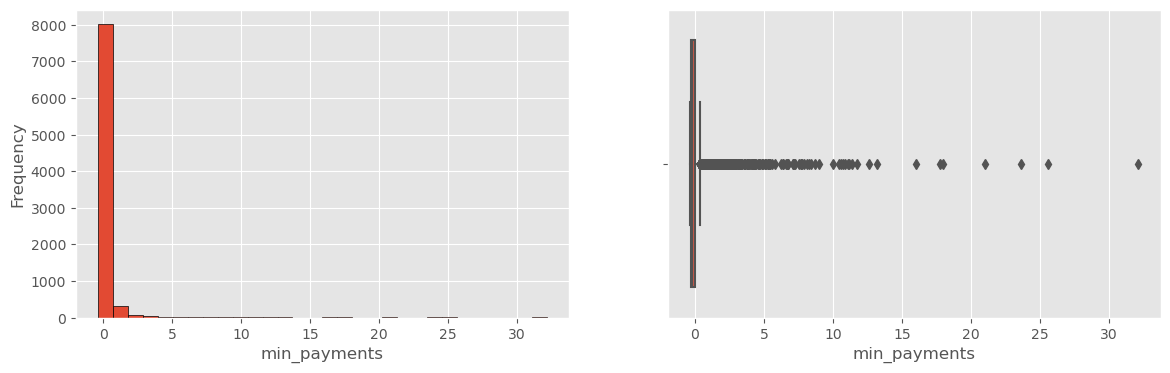

--------------------Full_Payment_Prc-------------------------


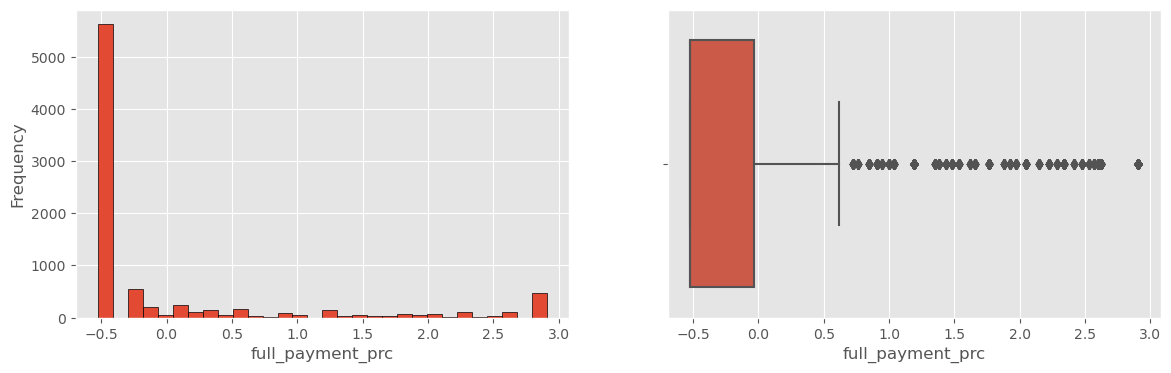

In [29]:
eda(X_scaled)

#### Apply Clustering methods

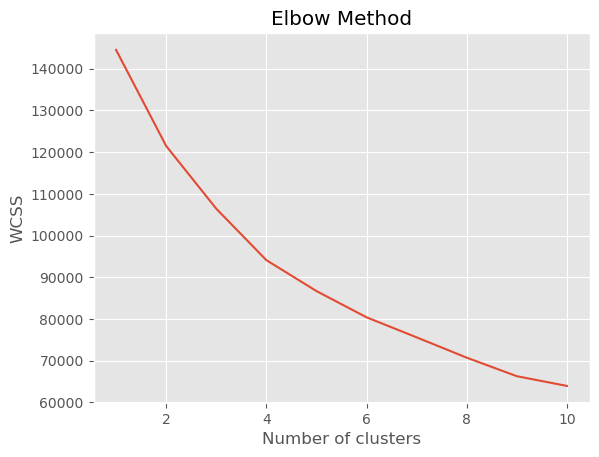

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,KMeans_Cluster
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,2
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,2
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,2
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,1


In [34]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


In [ ]:
# K medoids

In [36]:
from sklearn.cluster import KMedoids

# Determine the optimal number of clusters using the elbow method
cost = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(X_scaled)
    cost.append(kmedoids.inertia_)

# Plot the elbow method graph
plt.figure()
plt.plot(range(1, 11), cost)
plt.title('Elbow Method (K-Medoids)')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

# Assuming the optimal number of clusters is 4
kmedoids = KMedoids(n_clusters=4, random_state=42)
df['KMedoids_Cluster'] = kmedoids.fit_predict(X_scaled)

print(df.head())


ImportError: cannot import name 'KMedoids' from 'sklearn.cluster' (/Users/ayushyapare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/__init__.py)

In [ ]:
# Hierarchical

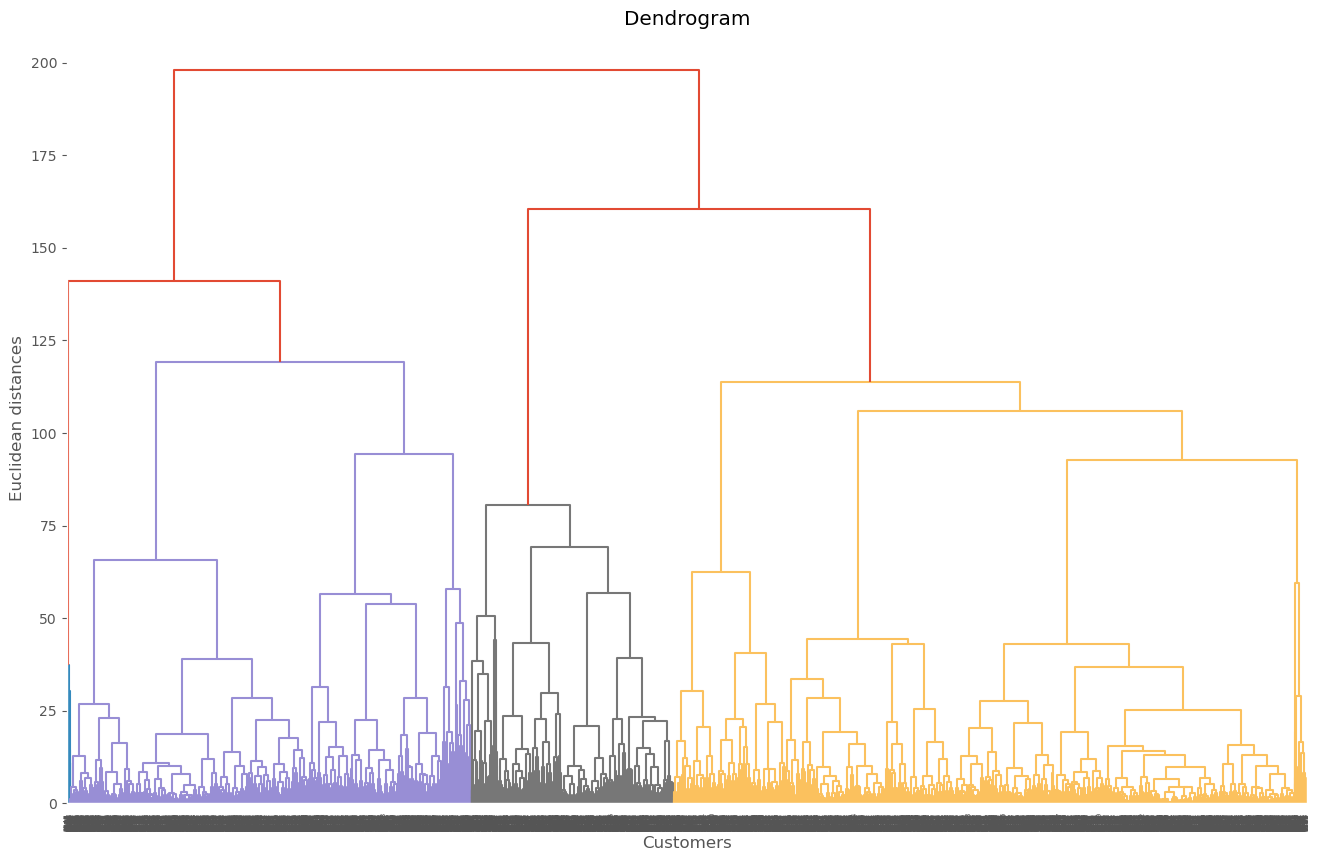

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,KMeans_Cluster,Hierarchical_Cluster
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,2,1
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,2,1
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1,1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,2,0
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,1,1


In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

df.head()


In [ ]:
# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

df.head()


,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,...,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,...,0,10,1000.0,11,89.868853,89.711672,0.428571,2,1,-1
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,...,0,6,1000.0,6,54.722514,82.955180,0.000000,2,1,0
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,...,6,0,1500.0,11,303.031979,443.781316,0.000000,1,1,-1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,...,0,13,2000.0,12,704.240770,795.859808,0.000000,2,0,-1
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,...,3,1,2500.0,12,4094.261427,40.142262,0.000000,1,1,-1


In [ ]:
# Visualization using PCA

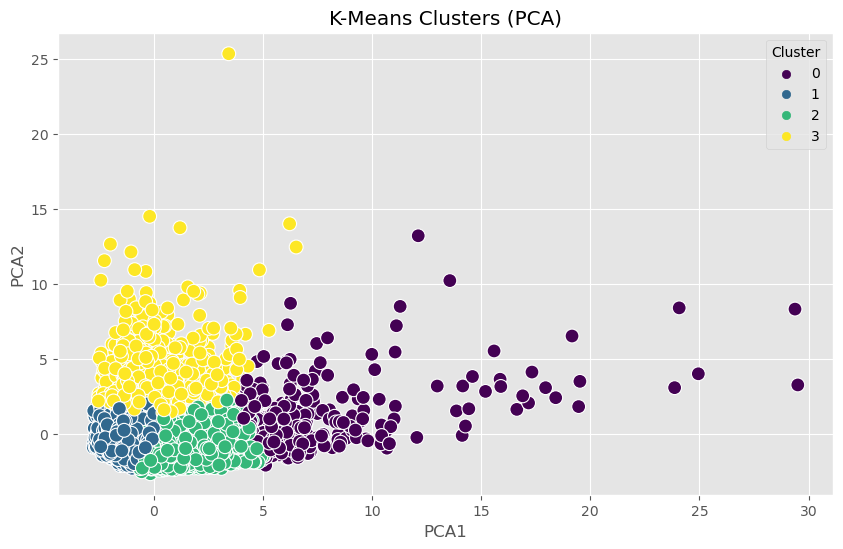

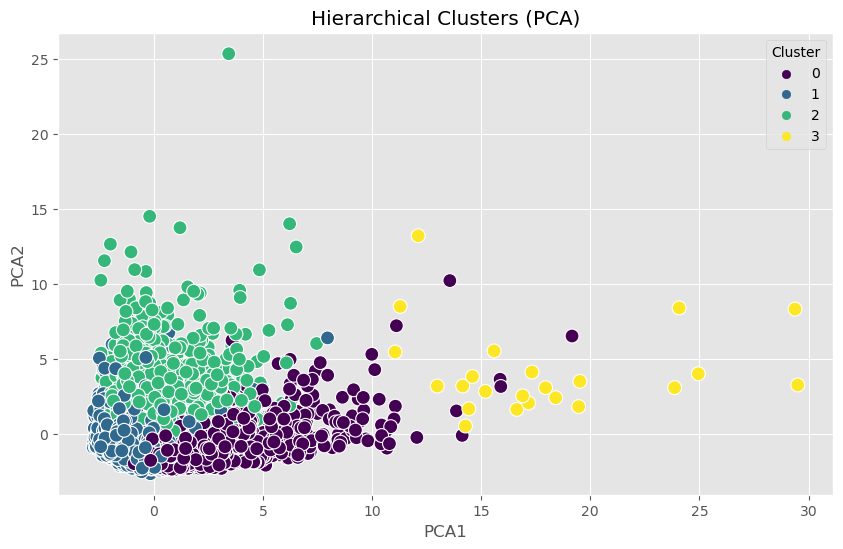

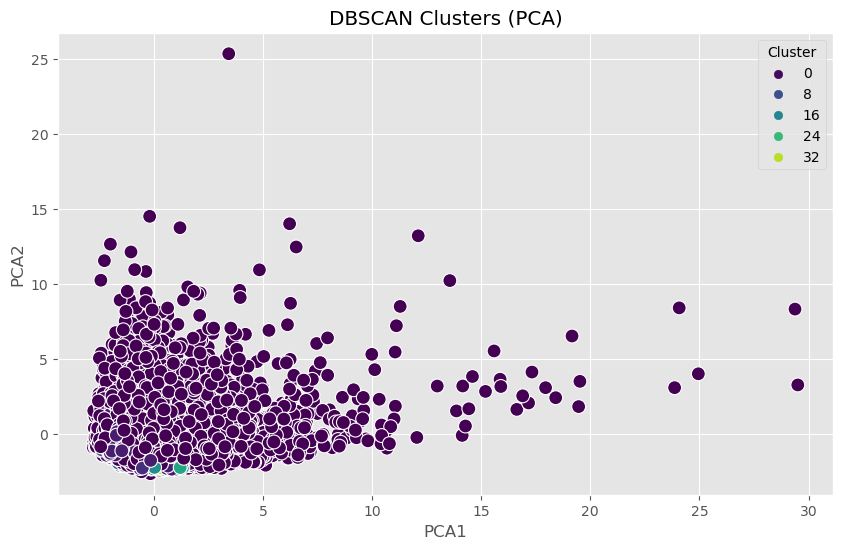

In [41]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

# Function to plot clusters
def plot_clusters(pca_df, cluster_labels, title):
    pca_df['Cluster'] = cluster_labels
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title='Cluster')
    plt.show()

# Plot clusters for each method
plot_clusters(pca_df, df['KMeans_Cluster'], 'K-Means Clusters (PCA)')
#plot_clusters(pca_df, df['KMedoids_Cluster'], 'K-Medoids Clusters (PCA)')
plot_clusters(pca_df, df['Hierarchical_Cluster'], 'Hierarchical Clusters (PCA)')
plot_clusters(pca_df, df['DBSCAN_Cluster'], 'DBSCAN Clusters (PCA)')


In [ ]:
# Silhuette score

In [44]:
from sklearn.metrics import silhouette_score

# Silhouette scores for each method
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
#silhouette_kmedoids = silhouette_score(X_scaled, df['KMedoids_Cluster'])
silhouette_hierarchical = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
silhouette_dbscan = silhouette_score(X_scaled, df['DBSCAN_Cluster'])

print(f'Silhouette Score (K-Means): {silhouette_kmeans}')
#print(f'Silhouette Score (K-Medoids): {silhouette_kmedoids}')
print(f'Silhouette Score (Hierarchical): {silhouette_hierarchical}')
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')


Silhouette Score (K-Means): 0.2006914185963922
Silhouette Score (Hierarchical): 0.17316598928046817
Silhouette Score (DBSCAN): -0.4643184465018336


<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>